In [29]:
list_left = [3,4,2,1,3,3]
list_right = [4,3,5,3,9,3]

1/1/2024

In [31]:
def TotalDistance(list2, list1):
    list1.sort()
    list2.sort()
    
    total_distance = 0
    for i in range(len(list1)) if len(list1)> len(list2) else range(len(list2)):
        try:
            total_distance += abs(list1[i]-list2[i])   
        except IndexError as e:
            total_distance += list1[i] if len(list1)> len(list2) else list2[i]
    return total_distance

TotalDistance(list_left,list_right)


11

In [32]:
def SimilarityIndex(list1, list2):
    total_similarity = 0
    for i in range(len(list1)):
        similarity = list1[i] * list2.count(list1[i])
        total_similarity += similarity     
        #print(f"For item {item}, which is in the first list {itemm_count}xtimes, the similarity is:{similarity}")
    #print(f"Total distance:{total_similarity}")
    return  total_similarity
SimilarityIndex(list_left,list_right)


31

2/1/2024

In [66]:
import numpy as np
reports = np.loadtxt("C:/Users/srboval1/AdventCode/day2.txt")

In [71]:
def safe(array):
    differences = np.diff(array)
    x = 0
    if np.all(differences <= -1) & np.all(-3 <= differences): x = 1
    elif np.all((differences >= 1) & (3 >= differences)): x = 1
    else: x = 0
    return x

total_safe = sum(safe(i) for i in iter(reports))
print(f"Number of safe reports: {total_safe}")
    

Number of safe reports: 2


3/12

In [58]:
memory = str('xmul(2,4)%&mul[3,7]!@^do_not_mul(5,5)+mul(32,64]then(mul(11,8)mul(8,5))')

sum = 0

def check(brackets):
    if (brackets.partition('(')[1]) == '(':
        out = brackets.partition('(')[2]
        return check(out)
    elif (brackets.partition('(')[1]) != '(':
        out = brackets.partition(',')
        return out  

def part1(memory, sum):
    new = memory.partition('(')[2]
    content1 = new.partition(')')[0]
    rest = new.partition(')')[2]
    result = check(content1)
    a = result[0]  
    b = result[2]  
    if a.isdigit() and b.isdigit():
        sum += (int(a)) * int(b)
        part1(rest, sum)
    elif len(rest) > 5:
        part1(rest, sum)
    else:
        print(f"The total sum is: {sum}")


final_sum = part1(memory, sum)


The total sum is: 161


5/12

In [17]:
def check(line,split_rules,total):
    set = line.strip().split(',')

    before = []
    after = set.copy()
    break_set = False

    for number in set:
        after.remove(number)
        break_set,message = exist(number,after, before,split_rules)
        before.append(number)
        
        if break_set:
            print(f"Update {set} is not in the right order because: {message}")
            break
        elif len(after) == 0 and not break_set:
            middle = int(set[len(set) // 2])
            print(f"Update {set} {message} and the middle number is {middle}")
            total += middle
            return total
        
    return total

def exist(number,after, before, split_rules):
    locations = []
    if number in rules:
        locations = [index for index, inner_list in enumerate(split_rules) if number in inner_list]
        for value in locations:
            if number in split_rules[value][0] and split_rules[value][1] in before:
                message = f"The number {number} is wrong because it should be before {split_rules[value][1]} "
                return True, message
            elif number in split_rules[value][1] and split_rules[value][0] in after:
                message = f"The number {number} is wrong because it should be after {split_rules[value][0]} "
                return True, message
            
    return False, "is ok"

       
with open("C:/Users/srboval1/AdventCode/day5_rules.txt") as rules:
    rules = (rules.read())
    split_rules = [i.split("|") for i in rules.strip().split("\n")]

with open("C:/Users/srboval1/AdventCode/day5_updates.txt") as updates:
    total = 0
    for line in updates:
        total = check(line,split_rules,total)

print(f"The total sum of middle numbers from correct updates is {total}")

    

[['47', '53'], ['97', '13'], ['97', '61'], ['97', '47'], ['75', '29'], ['61', '13'], ['75', '53'], ['29', '13'], ['97', '29'], ['53', '29'], ['61', '53'], ['97', '53'], ['61', '29'], ['47', '13'], ['75', '47'], ['97', '75'], ['47', '61'], ['75', '61'], ['47', '29'], ['75', '13'], ['53', '13']]
Update ['75', '47', '61', '53', '29'] is ok and the middle number is 61
Update ['97', '61', '53', '29', '13'] is ok and the middle number is 53
Update ['75', '29', '13'] is ok and the middle number is 29
Update ['75', '97', '47', '61', '53'] is not in the right order because: The number 75 is wrong because it should be after 97 
Update ['61', '13', '29'] is not in the right order because: The number 13 is wrong because it should be after 29 
Update ['97', '13', '75', '29', '47'] is not in the right order because: The number 13 is wrong because it should be after 29 
The total sum of middle numbers from correct updates is 143


Day 7

In [142]:
import itertools

def testing(operator_sequence, number, value_combination, sequence_no):
    expression = f"{value_combination[sequence_no][0]}"
    
    for i in range(1, len(value_combination[0])):
        expression += f" {operator_sequence[i - 1]} {value_combination[sequence_no][i]}"
        expression = str(eval(expression))  
    
    if eval(expression) == int(number):
        print(f"Value combination {value_combination[sequence_no]} with {operator_sequence} equals to {number}")
        return eval(expression)

def computation(operator_sequences, number, value_combination):    
    for operator_sequence in operator_sequences:
        result = testing(operator_sequence, number, value_combination, 0)
        if result is not None: 
            return result
    
def combinations(numbers, values):
    values_combinations = [list(itertools.permutations(i, len(i))) for i in values]
    operators_combinations = [list(itertools.product(['+', '*'], repeat=(len(i) - 1))) for i in values] 
    
    total_sum = 0
    
    for i, values_combination in enumerate(values_combinations):
        result = computation(operators_combinations[i], numbers[i], values_combination) 
        if result is not None:
            total_sum += result        
    
    if total_sum is not None:
        return total_sum
    
def parse(equations):
    numbers = [i.split(':')[0] for i in equations] 
    values_string = [i.split(':')[1] for i in equations]
    values = [[int(i) for i in i.split()] for i in values_string]  
    return combinations(numbers, values)  

with open("C:/Users/srboval1/AdventCode/day7.txt") as file:
    lines = file.read()  
    equations = [line for line in lines.strip().split("\n")] 
    total_sum = parse(equations)  
    
print(f"The total calibration result (i.e the sum of the test values from just the equations that could possibly be true) is: {total_sum}")


Value combination (10, 19) with ('*',) equals to 190
Value combination (81, 40, 27) with ('+', '*') equals to 3267
Value combination (11, 6, 16, 20) with ('+', '*', '+') equals to 292
The total calibration result (i.e the sum of the test values from just the equations that could possibly be true) is: 3749


In [142]:
import numpy as np

def trailhead(file):
    for i, line in enumerate(file):
        row = []
        for j, element in enumerate(line):
            value = int(element) if element.isdigit() else element
            pos = [i, j, value]
            row.append(pos)
            if value == 0:
                locations.append(pos)

        matrix.append(row)
    return locations,matrix

def check_lim(row_val, col_val):
    if 0 <= row_val < row_lim and 0 <= col_val < col_lim:
        return True
    

def hiking(i,top_coordinates):
    r,l,value = i
    if value < 9:
        try:
            if check_lim(r, l + 1) and (arr_matrix[r][l+1])[2] == value +1:
                new = [r,l+1,value+1]
                hiking(new,top_coordinates)
        except IndexError:
            pass
        try:
            if check_lim(r, l - 1) and (arr_matrix[r][l-1])[2] == value +1:
                new = [r,l-1,value+1]
                hiking(new,top_coordinates)
        except IndexError:
            pass
        
        try:
            if check_lim(r-1, l) and (arr_matrix[r-1][l])[2] == value +1:
                new = [r-1,l,value+1]
                hiking(new,top_coordinates)
        except IndexError:
            pass
        
        try:
            if check_lim(r+1, l) and (arr_matrix[r+1][l])[2] == value +1:
                new = [r+1,l,value+1]
                hiking(new,top_coordinates)
        except IndexError:
            pass
    elif value == 9 and i not in top_coordinates:
        top_coordinates.append(i)
    return top_coordinates
        

with open ("C:/Users/srboval1/AdventCode/day10.txt") as file:
    file = file.read()

locations=[]
matrix=[]

locations,matrix = trailhead(file.strip().split('\n'))
arr_matrix, arr_locations =np.array(matrix, dtype=object),np.array(locations, dtype=object)

row_lim, col_lim = arr_matrix.shape[:2] 

score=0
for i in arr_locations:
    top_coordinates = []
    print(f"The no of the final coordinates from {i} reached is {len(hiking(i,top_coordinates))} and they are {hiking(i,top_coordinates)}")
    score += len(hiking(i,top_coordinates))

print(f"The sum of scores of all {len(arr_locations)} trailheads is {score}")

The no of the final coordinates from [0 2 0] reached is 5 and they are [[3, 0, 9], [0, 1, 9], [4, 5, 9], [3, 4, 9], [5, 4, 9]]
The no of the final coordinates from [0 4 0] reached is 6 and they are [[2, 5, 9], [3, 4, 9], [4, 5, 9], [3, 0, 9], [0, 1, 9], [5, 4, 9]]
The no of the final coordinates from [2 4 0] reached is 5 and they are [[3, 0, 9], [0, 1, 9], [4, 5, 9], [3, 4, 9], [5, 4, 9]]
The no of the final coordinates from [4 6 0] reached is 3 and they are [[2, 5, 9], [3, 4, 9], [4, 5, 9]]
The no of the final coordinates from [5 2 0] reached is 1 and they are [[6, 4, 9]]
The no of the final coordinates from [5 5 0] reached is 3 and they are [[2, 5, 9], [3, 4, 9], [4, 5, 9]]
The no of the final coordinates from [6 0 0] reached is 5 and they are [[4, 5, 9], [3, 4, 9], [5, 4, 9], [3, 0, 9], [0, 1, 9]]
The no of the final coordinates from [6 6 0] reached is 3 and they are [[2, 5, 9], [3, 4, 9], [4, 5, 9]]
The no of the final coordinates from [7 1 0] reached is 5 and they are [[4, 5, 9], 

Torshavn poste map laser-cut

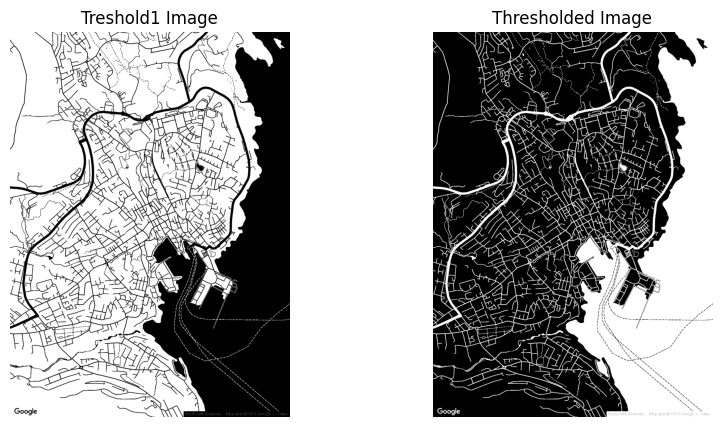

In [50]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/srboval1/AdventCode/torshavn_original.png")

if img is None:
    print("Error: Image not found!")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, binary_img = cv2.threshold(gray_img, 40, 255, cv2.THRESH_BINARY)
    _, binary_img1 = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY_INV)

    imgg = cv2.bitwise_and(binary_img,binary_img1)
    inverted_image = cv2.bitwise_not(imgg)

    # Show the original and thresholded images using Matplotlib
    plt.figure(figsize=(10,5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(imgg, cmap='gray')
    plt.title("Treshold1 Image")
    plt.axis('off')

    # Thresholded Image
    plt.subplot(1, 2, 2)
    plt.imshow(inverted_image, cmap='gray')
    plt.title("Thresholded Image")
    plt.axis('off')
    
    cv2.imwrite('torshavn_binary.png',imgg)


    plt.show()
